# Social Network Analysis

by Maxfield Thompson, Lauren Gardiner, and Jacob Jones

The following notebook will compute a superficial network analysis of Facebook data. The dataset used consists of 'circles' (or 'friends lists') from Facebook. The dataset includes node features (profiles), circles, and ego networks. 

Here is a description of the dataset and a [link:](https://snap.stanford.edu/data/egonets-Facebook.html) 

"Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent."

Also, much of the code for this project was inspired and/or used from the [LeJit's FacebookNetwork repository](https://app.dominodatalab.com/u/LeJit/FacebookNetwork/browse?)

### Step One: Import Packages

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
%matplotlib inline 

### Step Two: Base Exploratory Analysis

In [3]:
facebook_data = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), 
                                 nodetype = int)
print nx.info(facebook_data)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [4]:
# Next create the layout for network visualizations
network_layout = nx.spring_layout(facebook_data)

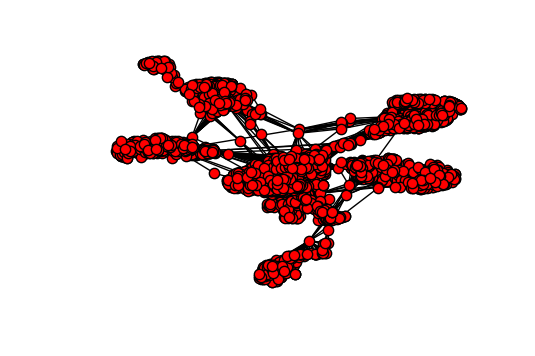

In [5]:
plt.axis("off")
nx.draw_networkx(facebook_data, pos = network_layout, with_labels = False,
                node_size = 55)

The above graph appears to have central clusters of users, but we don't know who specifically in the cluster is the most central. Thus in step three we want to find these primary users. 

### Step Three: Finding Central Points in the Network

In [6]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition
        
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

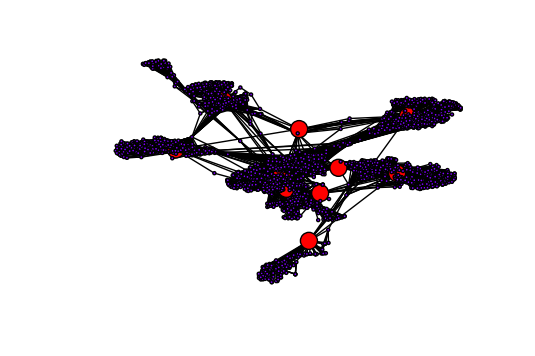

In [7]:
bt = between_parallel(facebook_data)
top = 10

max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(facebook_data.nodes())
bt_colors = [0]*len(facebook_data.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(facebook_data, pos = network_layout, cmap = plt.get_cmap("rainbow"), 
                 node_color = bt_colors, node_size = bt_values, with_labels = False)


Now something something something. 